In [38]:
import pandas as pd
arrest=pd.read_csv("Arrest Data.csv")
del arrest["AGE"]
del arrest["GENDER"]
del arrest["RACE"]
del arrest["PK"]
del arrest["CCR"]
query_mask=arrest["INCIDENTLOCATION"].str.contains("(?i)Pittsburgh")
arrest=arrest[query_mask]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside State"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside County"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Outside City"]
arrest = arrest[arrest.INCIDENTNEIGHBORHOOD != "Mt. Oliver Boro"]
arrest.dropna(subset=["INCIDENTNEIGHBORHOOD"], inplace=True)
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Golden Triangle/Civic Arena", "Central Business District")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Mt. Oliver Neighborhood", "Mount Oliver")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Troy Hill-Herrs Island", "Troy Hill")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Central North Side", "Central Northside")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Arlington", "Arlington-Arlington Heights")
arrest["INCIDENTNEIGHBORHOOD"]=arrest["INCIDENTNEIGHBORHOOD"].replace("Arlington Heights", "Arlington-Arlington Heights")
arrest.sample(100)

,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
43471,2020-09-24T16:10:00,"900 Block 2nd AV Pittsburgh, PA 15219",3921 Theft by Unlawful Taking or Disposition. ...,"2100 Block Whitehill DR Pittsburgh, PA 15219",Bedford Dwellings,2,509.0,NaN,NaN,0.000000,0.000000
13414,2017-09-29T13:00:00,"700 Block Lorenz AV Pittsburgh, PA 15220",13(a)(32) Paraphernalia - Use or Possession,"700 Block Lorenz AV Pittsburgh, PA 15220",Elliott,6,2020.0,2.0,5.0,-80.039247,40.445110
15845,2017-12-13T19:10:00,"700 Block James ST Pittsburgh, PA 15212",13(a)(16) Possession of Controlled Substance /...,"700 Block James ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.000535,40.453503
26320,2018-12-03T12:36:00,"600 Block 1st AV Pittsburgh, PA 15219",1311 Registration Card to be Signed and Exhibi...,"Kelly ST & Neuman WY Pittsburgh, PA 15221",Homewood South,5,1304.0,9.0,2.0,-79.888248,40.453541
46564,2021-02-12T12:10:00,"Bennett ST NE & N Homewood AV Pittsburgh, PA 1...",3925 Receiving Stolen Property. / 6105(a)(1) P...,"Bennett ST & N Homewood AV Pittsburgh, PA 15208",Homewood South,5,1303.0,9.0,2.0,-79.896663,40.456472
...,...,...,...,...,...,...,...,...,...,...,...
15974,2017-12-20T17:15:00,"Perrysville AV & Pusey ST Pittsburgh, PA 15214",5123 Contraband. / 13(a)(16) Possession of Con...,"Perrysville AV & Pusey ST Pittsburgh, PA 15214",Perry South,1,2615.0,6.0,1.0,-80.010158,40.471895
2468,2016-10-26T17:30:00,"Fort Duquesne BL & Stanwix ST Pittsburgh, PA 1...",9501 Bench Warrant,"10th St Byp RAMP Pittsburgh, PA 15222",Central Business District,2,201.0,NaN,NaN,0.000000,0.000000
26660,2018-12-09T05:46:00,"1300 Block Woodland AV Pittsburgh, PA 15212","2701(a)(1) Simple Assault - Intent., Know., Re...","1300 Block Woodland AV Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.030269,40.469231
27938,2019-01-29T18:38:00,"200 Block Dinwiddie ST Pittsburgh, PA 15219",2701 Simple Assault.,"200 Block Dinwiddie ST Pittsburgh, PA 15219",Crawford-Roberts,2,305.0,6.0,3.0,-79.980713,40.439082


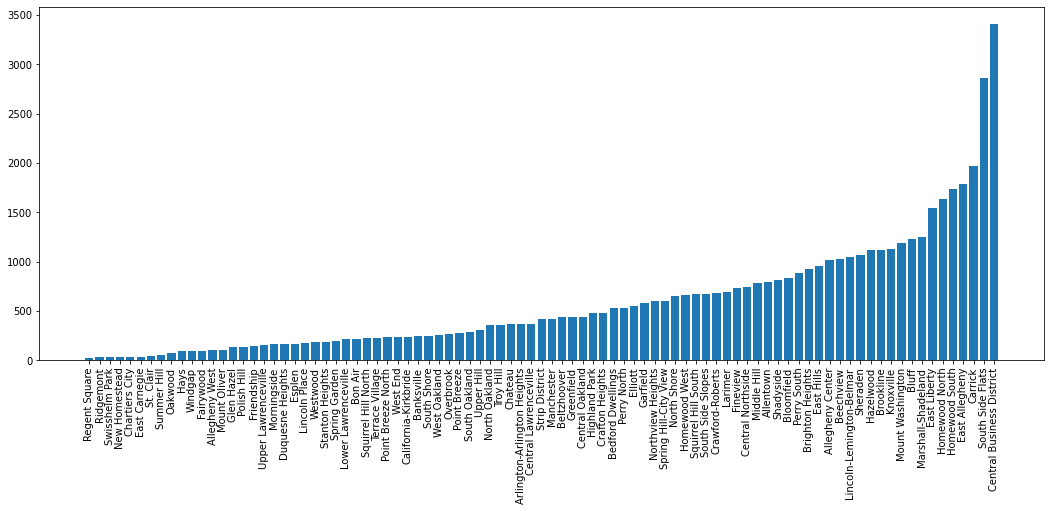

In [42]:
import operator
import matplotlib.pyplot as plt
d=dict()
locations=arrest["INCIDENTNEIGHBORHOOD"].values.tolist()
for x in range(len(locations)):
    if locations[x] in d.keys():
        d[locations[x]]=d[locations[x]]+1
    else:
        d[locations[x]]=1
dsort=sorted(d.items(), key=operator.itemgetter(1))
names, data = zip(*dsort)
plt.figure(figsize=(18,6.5))
plt.bar(names, data)
plt.xticks(rotation=90)
plt.show()

Top 3: 
* Regent Square
* Ridgemont
* Swisshelm Park

Bottom 3:
* Central Business District
* South Side Flats
* Carrick

[('Allegheny Center', 1019), ('Allegheny West', 110), ('Allentown', 799), ('Arlington-Arlington Heights', 372), ('Banksville', 243), ('Bedford Dwellings', 530), ('Beechview', 1030), ('Beltzhoover', 436), ('Bloomfield', 839), ('Bluff', 1226), ('Bon Air', 218), ('Brighton Heights', 925), ('Brookline', 1118), ('California-Kirkbride', 239), ('Carrick', 1967), ('Central Business District', 3411), ('Central Lawrenceville', 373), ('Central Northside', 741), ('Central Oakland', 443), ('Chartiers City', 35), ('Chateau', 365), ('Crafton Heights', 481), ('Crawford-Roberts', 688), ('Duquesne Heights', 169), ('East Allegheny', 1785), ('East Carnegie', 37), ('East Hills', 958), ('East Liberty', 1545), ('Elliott', 547), ('Esplen', 170), ('Fairywood', 100), ('Fineview', 730), ('Friendship', 144), ('Garfield', 584), ('Glen Hazel', 136), ('Greenfield', 441), ('Hays', 94), ('Hazelwood', 1115), ('Highland Park', 478), ('Homewood North', 1636), ('Homewood South', 1739), ('Homewood West', 668), ('Knoxville'